# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.144811e+01     6.977321e+00
 * time: 0.062439918518066406
     1     2.727757e+01     4.107577e+00
 * time: 0.07036304473876953
     2     2.012196e+01     5.247576e+00
 * time: 0.0902400016784668
     3     1.232561e+01     1.931324e+00
 * time: 0.11379098892211914
     4     1.143124e+01     3.143606e+00
 * time: 0.1286458969116211
     5     1.090673e+01     1.444851e+00
 * time: 0.14359307289123535
     6     9.712467e+00     1.411276e+00
 * time: 0.15842604637145996
     7     9.095682e+00     7.873080e-01
 * time: 0.17319989204406738
     8     8.854070e+00     4.162204e-01
 * time: 0.18818306922912598
     9     8.837694e+00     8.779514e-01
 * time: 0.1994469165802002
    10     8.772311e+00     6.805789e-01
 * time: 0.2106609344482422
    11     8.730587e+00     8.113144e-01
 * time: 0.22203803062438965
    12     8.683162e+00     4.770001e-01
 * time: 0.23723602294921875
    13     8.638695e+00     4.492949e-01
 * time: 0.

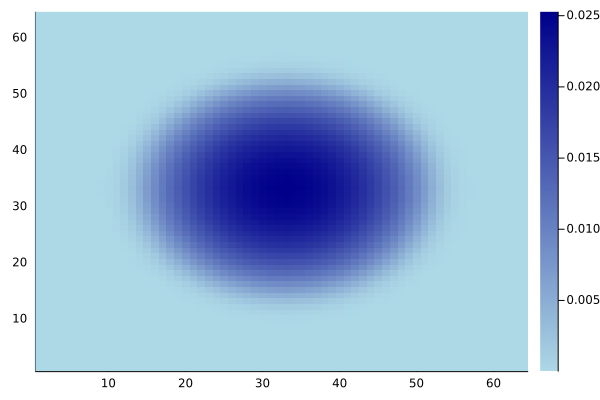

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)